This notebook finds the best fit for the time shift under the assumption that the log-plot should be linear

In [10]:
# Imports 

import numpy as np
import pandas as pd

import iqplot
import bebi103

import bokeh.io
import bokeh.plotting

# bokeh.io.output_notebook()

# Import seaborn for aesthetic plots 
import seaborn as sns

from tqdm.notebook import tqdm

import pandas as pd
import ast

from bokeh.plotting import figure, show, curdoc
from bokeh.io import output_notebook
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColorBar
from bokeh.transform import linear_cmap
from bokeh.palettes import Viridis256
from bokeh.themes import Theme
from bokeh.layouts import column, row

import scipy as sp
import matplotlib.pyplot as plt

# Plotting params
size = 500;

import numpy as np 
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()
import sys
import os
import pandas as pd
import bebi103
import iqplot
import scipy.optimize
import scipy.stats as st
import statsmodels.tools.numdiff as smnd
from scipy.optimize import curve_fit
import copy

Loading BokehJS ...

In [2]:
# Read data 

data_location = '../../analyzed_data/atp-hydro/ATP.csv';
# Read the CSV file into a DataFrame
df1 = pd.read_csv(data_location); 

data_location = '../../analyzed_data/atp-hydro/ADP.csv';
# Read the CSV file into a DataFrame
df2 = pd.read_csv(data_location); 

data_location = '../../analyzed_data/atp-hydro/Phosphate.csv';
# Read the CSV file into a DataFrame
df3 = pd.read_csv(data_location); 

#### ------------- Load and Read Data ------------- ####
ATP_conc_list = []
ADP_conc_list = []
P_conc_list = []
ATP_curve_list = []
ratio_curve_list = []
linear_r2_list = []
exponential_r2_list = []
linear_hydrolysis_rate_list = []
exponential_hydrolysis_rate_list = []
times_list = []
data_locations_list = []

for df in [df1]:
# for df in [df1, df2, df3]: 
    # ATP Concentrations
    ATP_conc_list.append(np.array(df["ATP Concentration (uM)"])); 

    # ADP Concentrations
    ADP_conc_list.append(np.array(df["ADP Concentration (uM)"])); 

    # Phosphate Concentrations
    P_conc_list.append(np.array(df["P Concentration (uM)"])); 

    # ATP Curves
    ATP_curve_list.append([ast.literal_eval(df["ATP Curve (uM)"][i]) for i in range(len(df))])

    # Ratio Curves
    ratio_curve_list.append([ast.literal_eval(df["Ratio (A.U.)"][i]) for i in range(len(df))])

    # Goodness of Fit
    linear_r2_list.append(np.array(df["r-squared for linear fit"])); 
    exponential_r2_list.append(np.array(df["r-squared for exponential fit"])); 

    # Hydrolysis Rate
    linear_hydrolysis_rate_list.append(np.array(df["Hydrolysis Rate (uM/s/motor) from Linear Fitting (-abs(Slope)/Motconc)"])); 
    exponential_hydrolysis_rate_list.append(np.array(df["Hydrolysis Rate (uM/s/motor) from Exponential Curve"])); 

    # Time
    times_list.append([ast.literal_eval(df["Time Array (s)"][i]) for i in range(len(df))])
    
    # Data location
    data_locations_list.append(df["Data Location"])

    
times_list = [item for sublist in times_list for item in sublist];
ATP_conc_list = [item for sublist in ATP_conc_list for item in sublist]; 
ADP_conc_list = [item for sublist in ADP_conc_list for item in sublist];
P_conc_list = [item for sublist in P_conc_list for item in sublist];
ATP_curve_list = [item for sublist in ATP_curve_list for item in sublist];
ratio_curve_list = [item for sublist in ratio_curve_list for item in sublist];
linear_r2_list = [item for sublist in linear_r2_list for item in sublist];
exponential_r2_list = [item for sublist in exponential_r2_list for item in sublist];
linear_hydrolysis_rate_list = [item for sublist in linear_hydrolysis_rate_list for item in sublist];
exponential_hydrolysis_rate_list = [item for sublist in exponential_hydrolysis_rate_list for item in sublist];
data_locations_list = [item for sublist in data_locations_list for item in sublist]; 

17 17


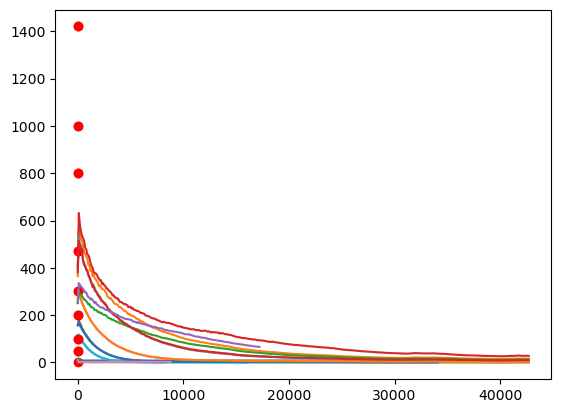

In [5]:
print(len(times_list), len(ATP_conc_list))
plt.figure()
for i in range(len(ATP_conc_list)): 
    # plt.figure()
    plt.plot(times_list[i], ATP_curve_list[i])
    plt.plot(0, ATP_conc_list[i], 'or')


In [39]:
# Define function
Keff = lambda KT, KD, KP, y0, ADP0, P0: KT*(1 + (y0 + ADP0)/KD + (y0 + P0)/KP)/((1/KT) - (1/KD) - (1/KP));
Ktime = lambda KT, KD, KP, y0, ADP0, P0, gamma, m: KT*(1 + (y0 + ADP0)/KD + (y0 + P0)/KP)/(gamma*m);
theoretical_time = lambda y, K_eff, K_time, y0: K_time*((y0 - y)/K_eff + np.log(y0/y)) 


KT = np.arange(10, 200, 10); 
KD = np.arange(100, 1000, 10); 
KP = np.arange(100, 1000, 10); 
y0 = 100; 
ADP0 = 0; 
P0 = 0;

K_eff_list = []
for KTi, KDi, KPi in zip(KT, KD, KP): 
    print(KTi, KDi, KPi)
    if 1/KTi - (1/KDi + 1/KPi) >0: 
        K_eff = Keff(KTi, KDi, KPi, y0, ADP0, P0); 
        K_eff_list.append(K_eff)
    
p = iqplot.ecdf(np.array(K_eff_list))
show(p)
print('min Keff', min(K_eff_list), 'y0/min Keff = ', y0/min(K_eff_list), 'exp(y0/min Keff) = ', np.exp(y0/min(K_eff_list)))
min_index = np.where(np.array(K_eff_list) == min(K_eff_list))[-1];
print('min KT, KD, KP', KT[min_index], KD[min_index], KP[min_index])

10 100 100
20 110 110
30 120 120
40 130 130
50 140 140
60 150 150
70 160 160
80 170 170
90 180 180
100 190 190
110 200 200
120 210 210
130 220 220
140 230 230
150 240 240
160 250 250
170 260 260
180 270 270
190 280 280


min Keff 374.99999999999994 y0/min Keff =  0.2666666666666667 exp(y0/min Keff) =  1.3056051720649522
min KT, KD, KP [10] [100] [100]


In [8]:
truncated_ATP_curve_list = []
truncated_times_list = []
for i in range(len(ATP_curve_list)): 
    index = np.where(np.array(times_list[i]) >= 6000)[-1]; # get index
    if len(index) != 0: 
        truncated_times_list.append(times_list[i][:index[0]])
        truncated_ATP_curve_list.append(ATP_curve_list[i][:index[0]])
    
# Plot logATP vs time
p = figure()
for i in range(len(truncated_ATP_curve_list)): 
    p.line(truncated_times_list[i], np.log(truncated_ATP_curve_list[i]))
show(p)


# Plot logATP vs time
KT, KD, KP = [100, 100, 900]
p = figure()
for i in range(len(truncated_ATP_curve_list)): 
    K_eff = Keff(KT, KD, KP, ATP_conc_list[i], ADP_conc_list[i], P_conc_list[i])
    K_time = Ktime(KT, KD, KP, ATP_conc_list[i], ADP_conc_list[i], P_conc_list[i], gamma = 1, m = 1);
    z = (truncated_ATP_curve_list[i] - ATP_conc_list[i])/K_eff + np.log(truncated_ATP_curve_list[i]/ATP_conc_list[i])
    p.line(truncated_times_list[i]/K_time, z)
show(p)


/var/folders/f0/pddct2nd5dxf7qtf3z57b8_c0000gn/T/ipykernel_4357/1160917169.py:22: RuntimeWarning: divide by zero encountered in divide
  z = (truncated_ATP_curve_list[i] - ATP_conc_list[i])/K_eff + np.log(truncated_ATP_curve_list[i]/ATP_conc_list[i])


In [9]:
### Fitting parameters

def line(data, tau): 
    slope, y0, time = data; 
    return -slope*(time + tau) + y0

#Curve-fit to the Langmuir curve
def fitting(data, time_curve, p0):
    """
    Performs a curve fitting using scipy.optimize.curve_fit 
    
    Parameters
    p0 = 1D list with 4 entries of parameter guesses
    
    Returns
    param = 1D list with fit values of each parameter
    curve = 1D array of intensity values for every concentration in xvals
    xvals = 1D array from 0 to maxconc with step size 1
    """
    
    
    #Curve fits and returns parameter values as well as the covarience
    param, param_cov = curve_fit(line, 
                                 data, 
                                 time_curve, 
                                 p0, 
                                 #bounds = (-np.ones([2])*np.inf, np.ones([2])*np.inf)
                                )

    #stores the new function information according to the coefficients given by curve-fit() function 

    curve = line(time, param[0], param[1])
    
    print(param, param_cov)
    return param, param_cov

-0.0873362130896777


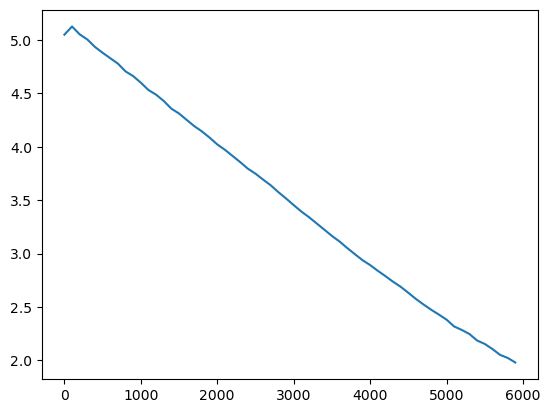

In [12]:
# Pick a curve
index = 10; 

y = truncated_ATP_curve_list[index]; 
t = truncated_times_list[index]; 
slope = (y[5] - y[3])/(t[5] - t[3])
print(slope)
plt.plot(t, np.log(y))

